https://www.kaggle.com/datasets/ranzeet013/student-graduation-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os 
import psycopg as pg
import sqlalchemy as sqla
import dotenv as dotenv

In [2]:
dotenv.load_dotenv()

database = os.getenv('DB_NAME')
user = os.getenv('DB_USER')
password = os.getenv('DB_PASSWORD')
host = os.getenv('DB_HOST')

engine = sqla.create_engine(f'postgresql+psycopg://{user}:{password}@{host}/{database}', pool_pre_ping=True, )

df_graduation_Students = pd.read_sql_table('students_graduation', engine)

In [3]:
df_graduation_Students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df_graduation_Students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df_graduation_Students.select_dtypes(include=['int64', 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [20]:
df_corr = df_graduation_Students.select_dtypes(include=['int64', 'float64']).corr()

In [13]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

<Axes: >

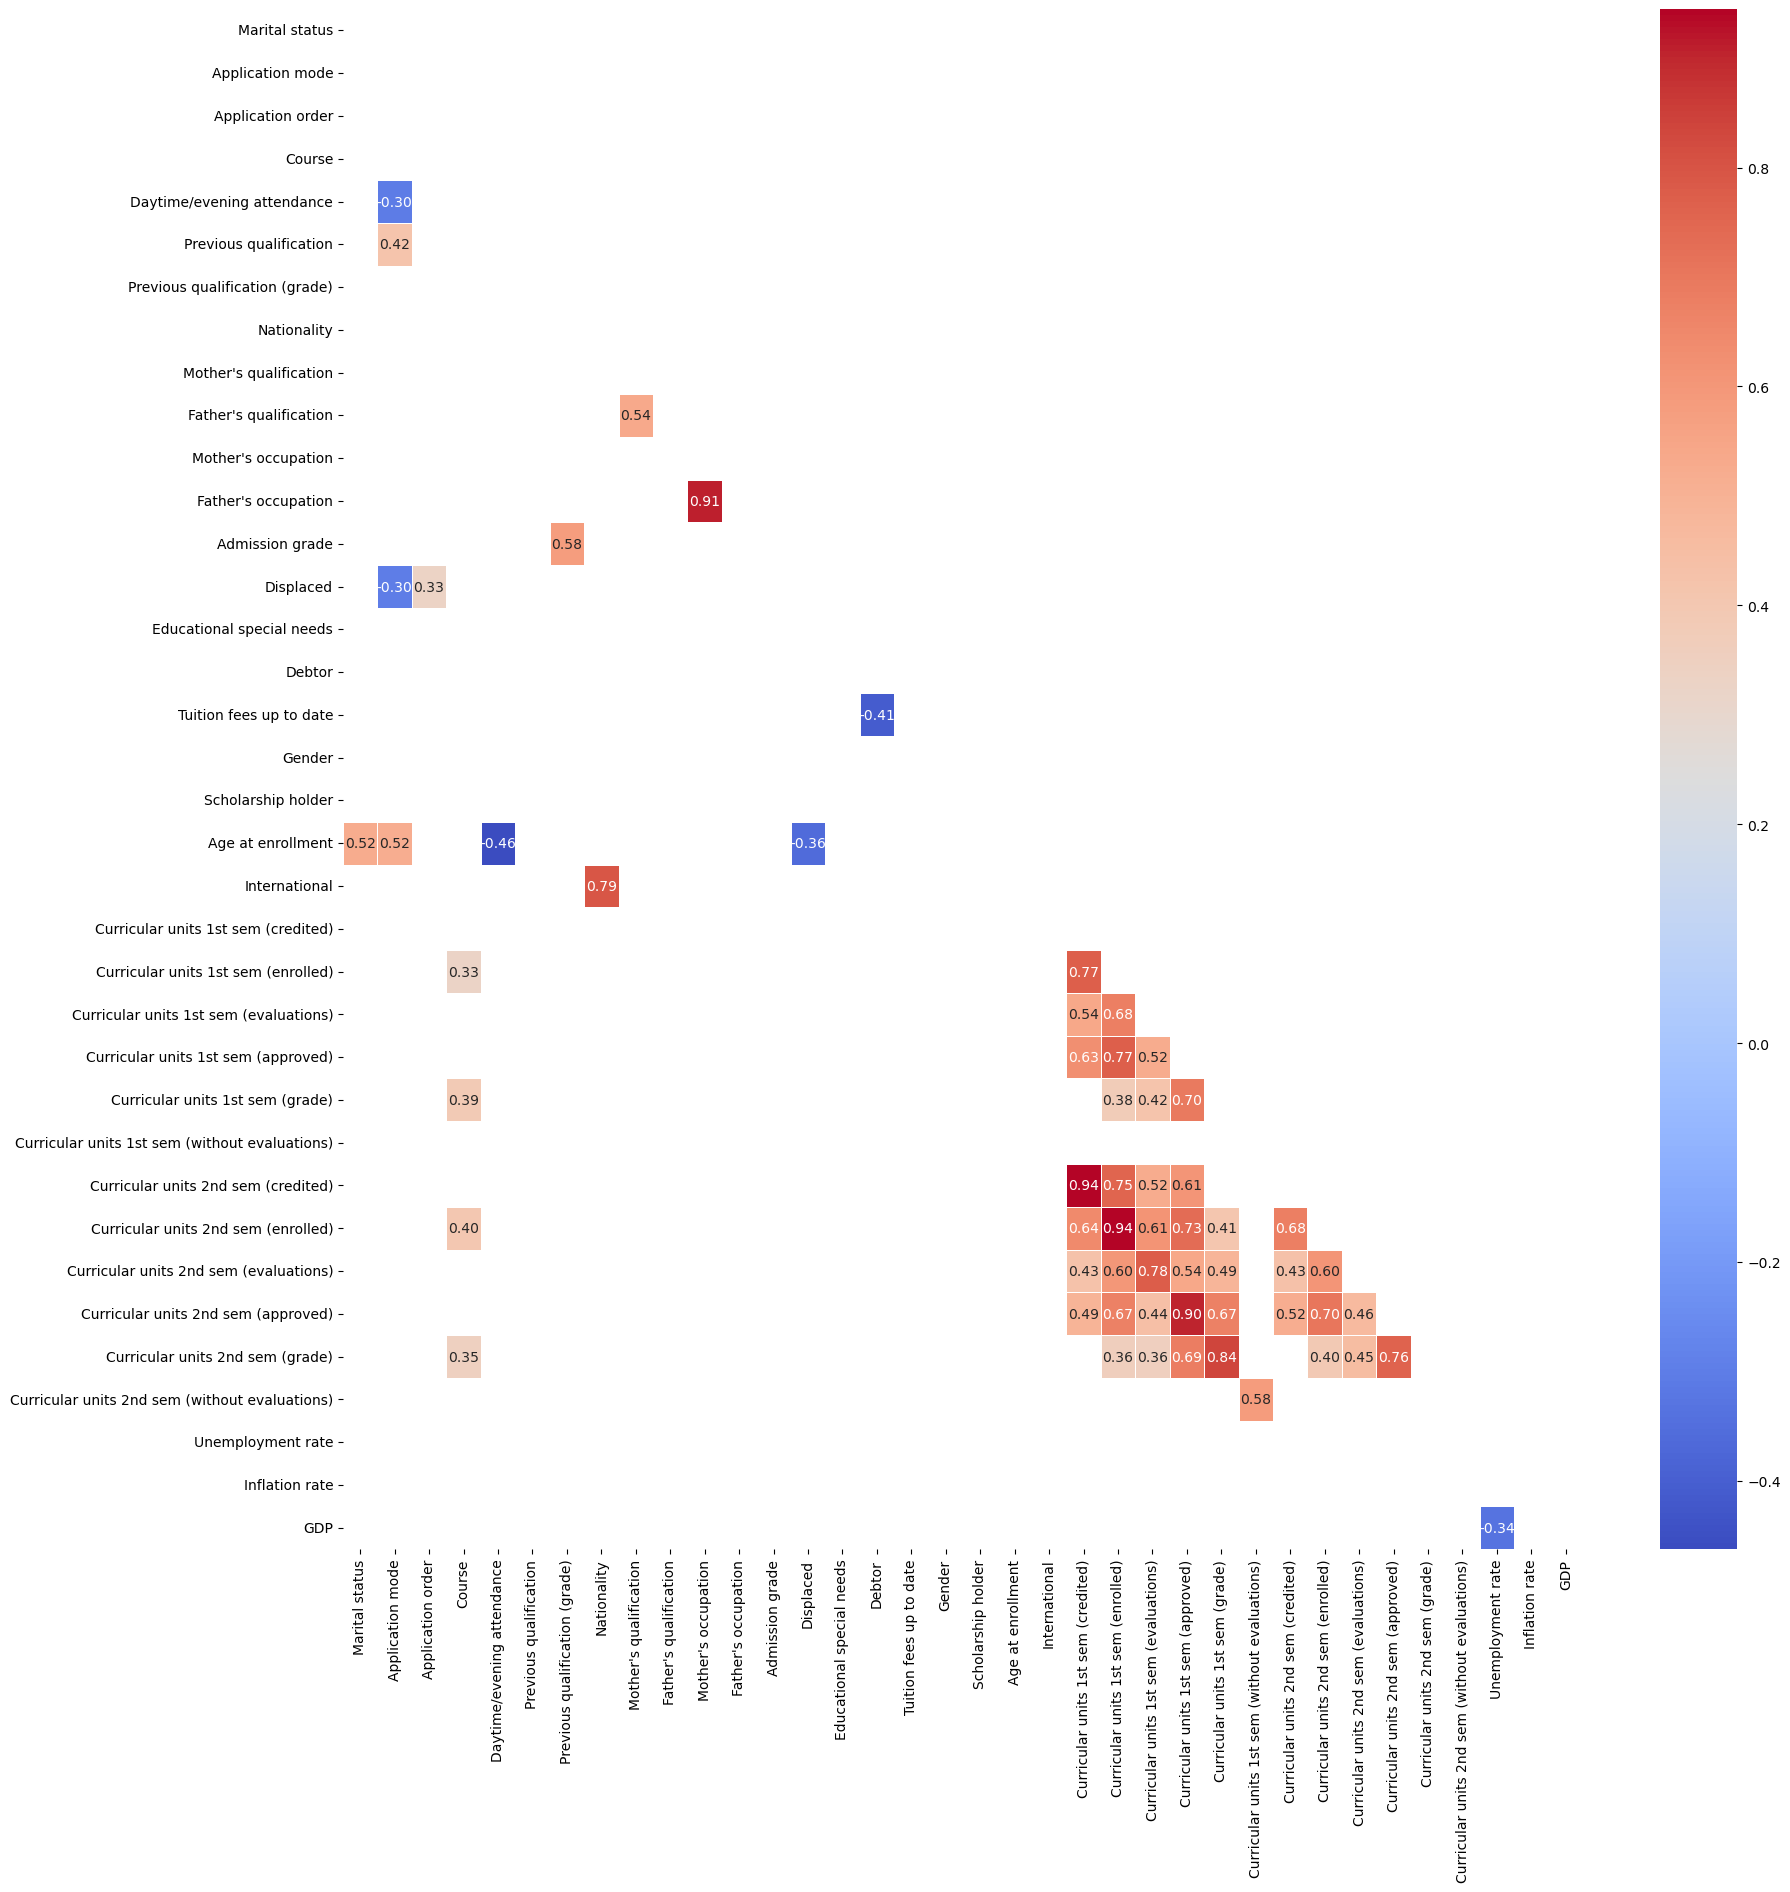

In [36]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr, mask=mask  | (np.abs(df_corr) < 0.3), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

In [32]:

df_corr.abs().unstack().sort_values(ascending=False).drop_duplicates()[15:40]

Curricular units 2nd sem (grade)                Curricular units 1st sem (approved)               0.685560
Curricular units 1st sem (evaluations)          Curricular units 1st sem (enrolled)               0.680220
Curricular units 2nd sem (credited)             Curricular units 2nd sem (enrolled)               0.676258
Curricular units 1st sem (enrolled)             Curricular units 2nd sem (approved)               0.673341
Curricular units 1st sem (grade)                Curricular units 2nd sem (approved)               0.673335
Curricular units 1st sem (credited)             Curricular units 2nd sem (enrolled)               0.644826
                                                Curricular units 1st sem (approved)               0.628394
Curricular units 1st sem (evaluations)          Curricular units 2nd sem (enrolled)               0.611842
Curricular units 1st sem (approved)             Curricular units 2nd sem (credited)               0.607661
Curricular units 2nd sem (evaluations

In [66]:
df_graduation_Students.groupby(['GDP', 'Unemployment rate']).size()

GDP    Unemployment rate
-4.06  15.5                 397
-3.12  9.4                  533
-1.70  12.7                 419
-0.92  16.2                 362
 0.32  7.6                  571
 0.79  13.9                 390
 1.74  10.8                 525
 1.79  12.4                 445
 2.02  11.1                 414
 3.51  8.9                  368
dtype: int64

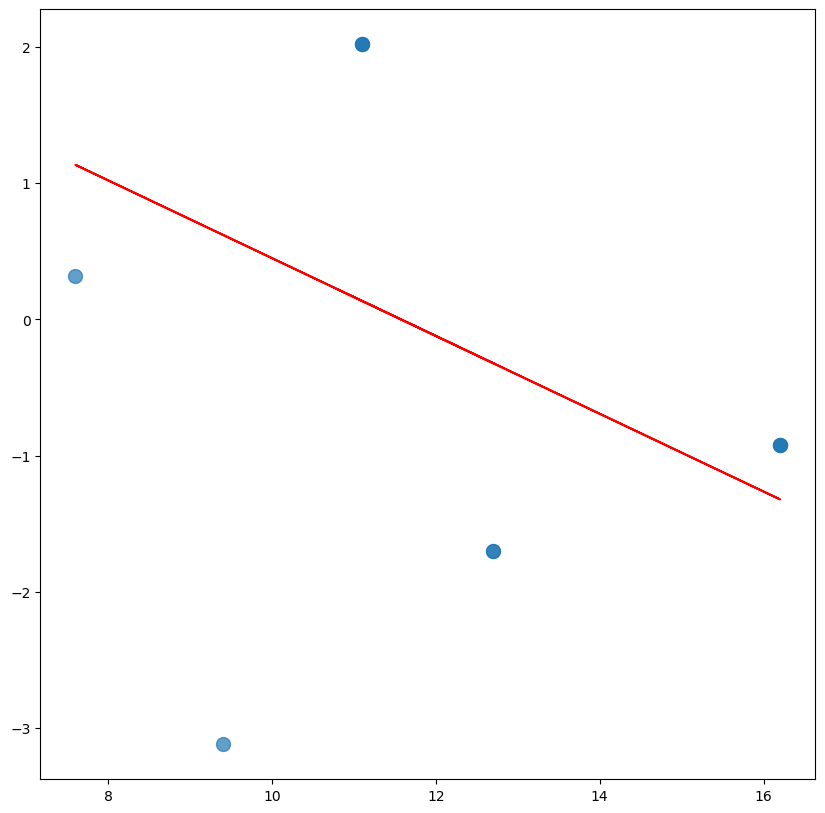

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter( df_graduation_Students['Unemployment rate'],df_graduation_Students['GDP'], s=100, alpha=0.7 )

a, x = np.polyfit(df_graduation_Students['Unemployment rate'],df_graduation_Students['GDP'], 1)
plt.plot(df_graduation_Students['Unemployment rate'], a*df_graduation_Students['Unemployment rate']+x, color='red')

In [80]:
attendance_count = df_graduation_Students.groupby('Age at enrollment')['Daytime/evening attendance'].value_counts().unstack()


In [83]:
attendance_count.reset_index(inplace=True)

In [92]:
attendance_count.columns = ['Age at enrollment', 'Evening', 'Daytime']

<BarContainer object of 46 artists>

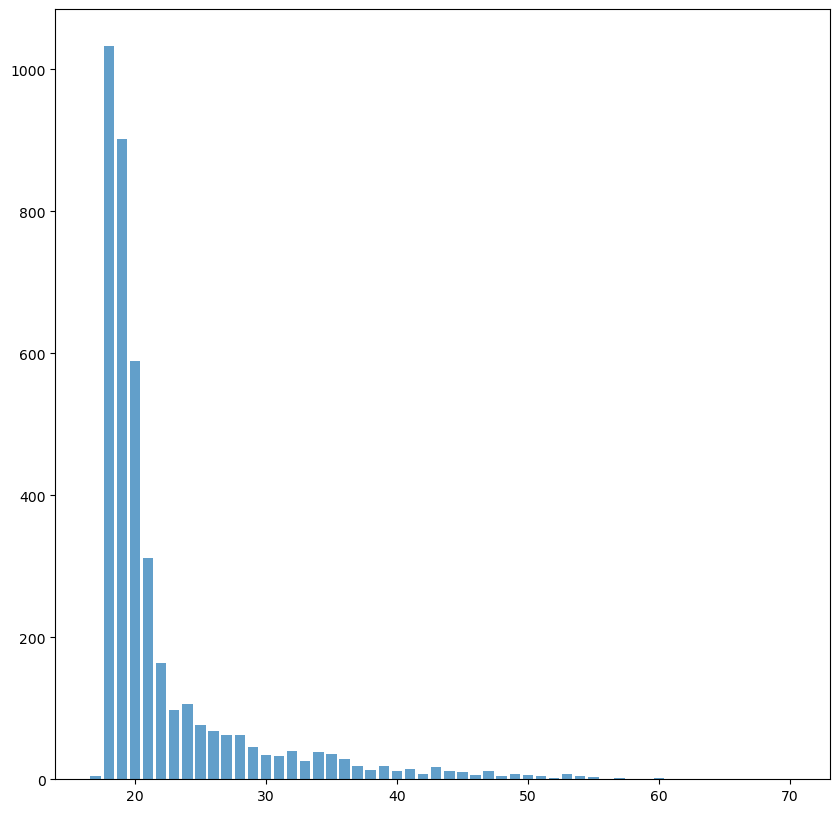

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(attendance_count['Age at enrollment'], height=attendance_count['Daytime'], alpha=0.7 )

(array([1.952e+03, 1.095e+03, 2.390e+02, 2.780e+02, 1.980e+02, 1.160e+02,
        1.540e+02, 1.060e+02, 6.100e+01, 6.900e+01, 5.500e+01, 2.900e+01,
        3.600e+01, 1.800e+01, 5.000e+00, 8.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([17.  , 19.65, 22.3 , 24.95, 27.6 , 30.25, 32.9 , 35.55, 38.2 ,
        40.85, 43.5 , 46.15, 48.8 , 51.45, 54.1 , 56.75, 59.4 , 62.05,
        64.7 , 67.35, 70.  ]),
 <BarContainer object of 20 artists>)

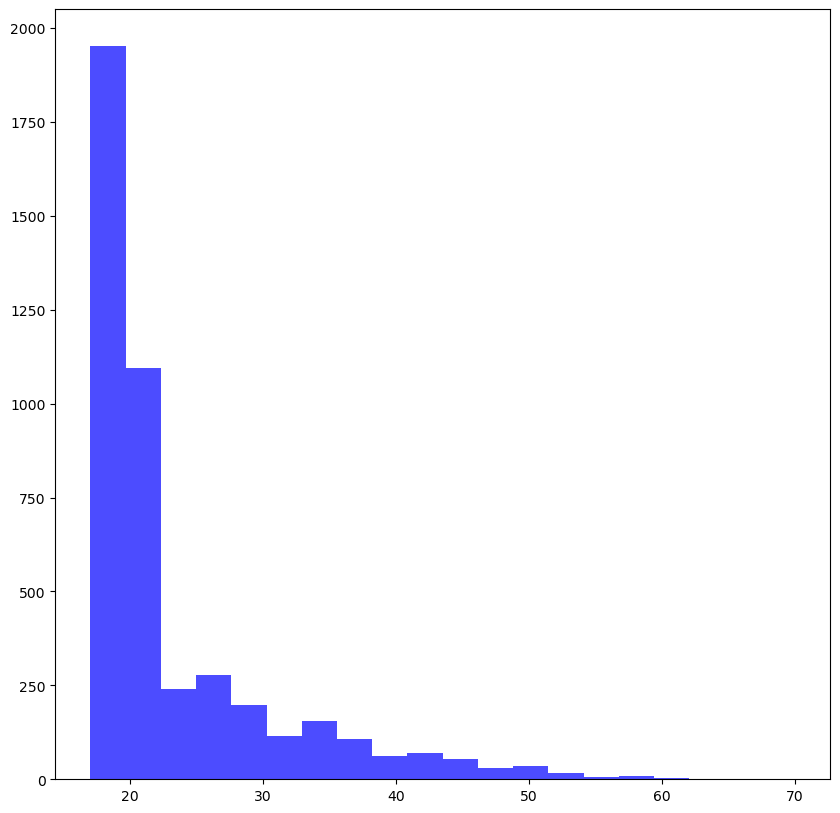

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.hist(df_graduation_Students['Age at enrollment'], bins=20, color='blue', alpha=0.7)